In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # for model evaluation metrics
from sklearn.preprocessing import LabelEncoder # for encoding labels

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

import cv2

In [4]:
# Load dataset
ct_brain = pd.read_csv('D:\S2\Semester 2\AI Lanjut\Final Project\dataset\ct_brain.csv')
ct_brain
# drop duplicated
print("Duplikat :",ct_brain.duplicated().sum())
print("Nilai Null :")
print(pd.isnull(ct_brain).sum())
# drop dcm column
ct_brain.drop(['dcm'], axis=1, inplace=True)

Duplikat : 0
Nilai Null :
dcm     0
jpg     0
type    0
dtype: int64


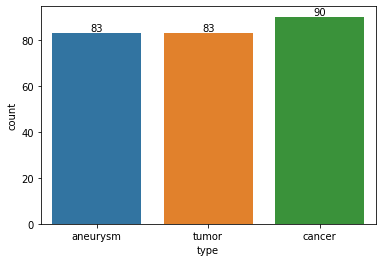

In [5]:
ax = sns.countplot(x='type', data=ct_brain)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

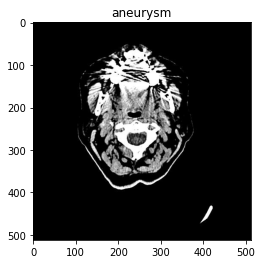

In [6]:
# display one image of aneurysm
example = 'D:\S2\Semester 2\AI Lanjut\Final Project\dataset/files' + ct_brain.iloc[0][0]
img_aneurysm = mpimg.imread(example)
imgplot = plt.imshow(img_aneurysm)
plt.title(ct_brain.iloc[0][1])
plt.show()

### Data Pre-Processing

In [7]:
data=[]
for img in ct_brain['jpg'].values:
    img_file = 'D:\S2\Semester 2\AI Lanjut\Final Project\dataset/files'+img
    image = cv2.imread(img_file)
    data.append(image)

In [8]:
# normalization
data = np.array(data, dtype="float") / 255.0

In [9]:
print("Shape of whole data: ", data.shape)

Shape of whole data:  (256, 512, 512, 3)


In [10]:
grayscale_data = data[:, :, :, 0]
print("Shape of whole data: ", grayscale_data.shape)

Shape of whole data:  (256, 512, 512)


In [11]:
label = ct_brain['type'].values

In [12]:
# split to features and target
X =  grayscale_data.copy()
y = label.copy()

# Encode labels
enc = LabelEncoder()
y = enc.fit_transform(y)

In [13]:
# train validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


In [14]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (204, 512, 512)
Shape of y_train:  (204,)
Shape of X_test:  (52, 512, 512)
Shape of y_test:  (52,)


In [15]:
y_train, y_test

(array([1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2,
        0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0,
        1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
        2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0,
        2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1,
        2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1,
        1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,
        0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0,
        1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0,
        1, 2, 0, 1, 2, 0]),
 array([2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2,
        1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
        2, 0, 0, 0, 1, 2, 2, 0]))

In [16]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([69, 74, 61], dtype=int64))

In [17]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([14, 16, 22], dtype=int64))

### Baseline and Hyperparameter Learning Rate Observation

In [18]:
results = {
    # 'model_summary': [],
    'params': [],
    'accuracy_train':[],
    'accuracy_test':[],
    'classification_report_train':[],
    'classification_report_test':[],
    'confusion_matrix_train':[],
    'confusion_matrix_test':[],
    }

In [19]:
# baseline model LR is 0.001
num_of_learningrate = [10, 1, 0.1, 0.01, 0.001, 0.0001]

Epoch 1/30
7/7 [==============================] - 4s 448ms/step - loss: 315923.9062 - accuracy: 0.3235
Epoch 2/30
7/7 [==============================] - 3s 419ms/step - loss: 14.3394 - accuracy: 0.3480
Epoch 3/30
7/7 [==============================] - 3s 413ms/step - loss: 6.2004 - accuracy: 0.3725
Epoch 4/30
7/7 [==============================] - 3s 411ms/step - loss: 5.0567 - accuracy: 0.3431
Epoch 5/30
7/7 [==============================] - 3s 428ms/step - loss: 3.7403 - accuracy: 0.3922
Epoch 6/30
7/7 [==============================] - 3s 421ms/step - loss: 3.3639 - accuracy: 0.3284
Epoch 7/30
7/7 [==============================] - 3s 422ms/step - loss: 2.2940 - accuracy: 0.3382
Epoch 8/30
7/7 [==============================] - 3s 427ms/step - loss: 1.8255 - accuracy: 0.2892
Epoch 9/30
7/7 [==============================] - 3s 422ms/step - loss: 1.3773 - accuracy: 0.3088
Epoch 10/30
7/7 [==============================] - 3s 427ms/step - loss: 1.5890 - accuracy: 0.3186
Epoch 11/30
7

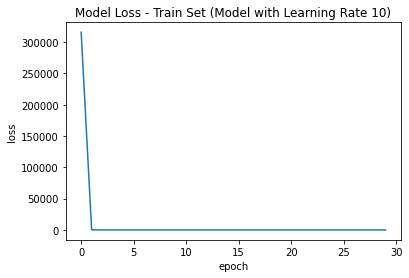

2/2 [==============================] - 0s 154ms/step

------------------------- Model Summary -------------------------
Model: "CNN-Model-LearningRate-10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 2D-Convolutional-Layer-1 (C  (None, 511, 511, 2)      10        
 onv2D)                                                          
                                                                 
 2D-MaxPool-Layer-1 (MaxPool  (None, 255, 255, 2)      0         
 ing2D)                                                          
                                                                 
 Dropout-Layer-1 (Dropout)   (None, 255, 255, 2)       0         
                                                                 
 Flatten-Layer (Flatten)     (None, 130050)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 4)               

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Epoch 1/30
7/7 [==============================] - 5s 632ms/step - loss: 25292.2402 - accuracy: 0.2941
Epoch 2/30
7/7 [==============================] - 4s 583ms/step - loss: 1.3607 - accuracy: 0.3627
Epoch 3/30
7/7 [==============================] - 4s 569ms/step - loss: 1.2768 - accuracy: 0.3284
Epoch 4/30
7/7 [==============================] - 4s 575ms/step - loss: 1.2280 - accuracy: 0.2794
Epoch 5/30
7/7 [==============================] - 4s 569ms/step - loss: 1.1128 - accuracy: 0.3333
Epoch 6/30
7/7 [==============================] - 4s 581ms/step - loss: 1.1195 - accuracy: 0.3137
Epoch 7/30
7/7 [==============================] - 4s 573ms/step - loss: 1.1108 - accuracy: 0.3529
Epoch 8/30
7/7 [==============================] - 4s 571ms/step - loss: 1.1038 - accuracy: 0.3137
Epoch 9/30
7/7 [==============================] - 4s 582ms/step - loss: 1.1098 - accuracy: 0.3627
Epoch 10/30
7/7 [==============================] - 4s 580ms/step - loss: 1.1043 - accuracy: 0.3382
Epoch 11/30
7/7

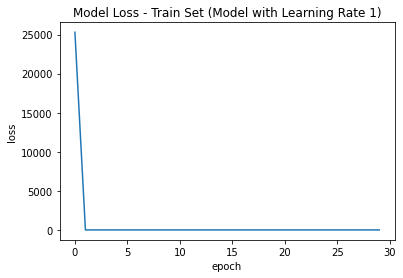

2/2 [==============================] - 0s 157ms/step

------------------------- Model Summary -------------------------
Model: "CNN-Model-LearningRate-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 2D-Convolutional-Layer-1 (C  (None, 511, 511, 2)      10        
 onv2D)                                                          
                                                                 
 2D-MaxPool-Layer-1 (MaxPool  (None, 255, 255, 2)      0         
 ing2D)                                                          
                                                                 
 Dropout-Layer-1 (Dropout)   (None, 255, 255, 2)       0         
                                                                 
 Flatten-Layer (Flatten)     (None, 130050)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 4)                

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Epoch 1/30
7/7 [==============================] - 5s 636ms/step - loss: 310.2889 - accuracy: 0.4412
Epoch 2/30
7/7 [==============================] - 4s 589ms/step - loss: 1.1135 - accuracy: 0.3627
Epoch 3/30
7/7 [==============================] - 4s 561ms/step - loss: 1.1143 - accuracy: 0.3627
Epoch 4/30
7/7 [==============================] - 4s 575ms/step - loss: 1.1002 - accuracy: 0.3627
Epoch 5/30
7/7 [==============================] - 4s 570ms/step - loss: 1.0954 - accuracy: 0.3627
Epoch 6/30
7/7 [==============================] - 4s 571ms/step - loss: 1.0978 - accuracy: 0.2696
Epoch 7/30
7/7 [==============================] - 4s 580ms/step - loss: 1.0989 - accuracy: 0.3382
Epoch 8/30
7/7 [==============================] - 4s 571ms/step - loss: 1.0979 - accuracy: 0.3627
Epoch 9/30
7/7 [==============================] - 4s 588ms/step - loss: 1.0975 - accuracy: 0.3627
Epoch 10/30
7/7 [==============================] - 4s 579ms/step - loss: 1.0970 - accuracy: 0.3627
Epoch 11/30
7/7 [

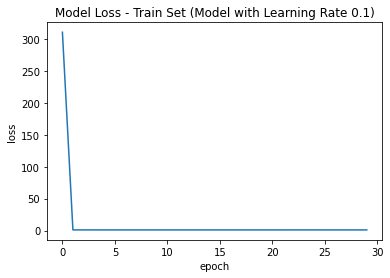

2/2 [==============================] - 0s 170ms/step

------------------------- Model Summary -------------------------
Model: "CNN-Model-LearningRate-0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 2D-Convolutional-Layer-1 (C  (None, 511, 511, 2)      10        
 onv2D)                                                          
                                                                 
 2D-MaxPool-Layer-1 (MaxPool  (None, 255, 255, 2)      0         
 ing2D)                                                          
                                                                 
 Dropout-Layer-1 (Dropout)   (None, 255, 255, 2)       0         
                                                                 
 Flatten-Layer (Flatten)     (None, 130050)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 4)              

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Epoch 1/30
7/7 [==============================] - 5s 629ms/step - loss: 8.0576 - accuracy: 0.3725
Epoch 2/30
7/7 [==============================] - 4s 576ms/step - loss: 0.9010 - accuracy: 0.5882
Epoch 3/30
7/7 [==============================] - 4s 589ms/step - loss: 0.7362 - accuracy: 0.6863
Epoch 4/30
7/7 [==============================] - 4s 581ms/step - loss: 0.6220 - accuracy: 0.8137
Epoch 5/30
7/7 [==============================] - 4s 567ms/step - loss: 0.5368 - accuracy: 0.8333
Epoch 6/30
7/7 [==============================] - 4s 584ms/step - loss: 0.5124 - accuracy: 0.7745
Epoch 7/30
7/7 [==============================] - 4s 573ms/step - loss: 0.4397 - accuracy: 0.9069
Epoch 8/30
7/7 [==============================] - 4s 589ms/step - loss: 0.4157 - accuracy: 0.9216
Epoch 9/30
7/7 [==============================] - 4s 586ms/step - loss: 0.3668 - accuracy: 0.9314
Epoch 10/30
7/7 [==============================] - 4s 586ms/step - loss: 0.3463 - accuracy: 0.9363
Epoch 11/30
7/7 [==

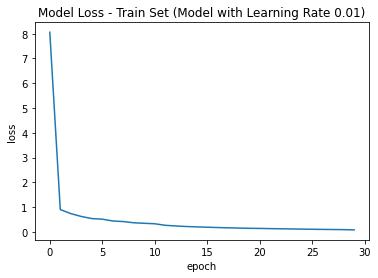

2/2 [==============================] - 0s 135ms/step

------------------------- Model Summary -------------------------
Model: "CNN-Model-LearningRate-0.01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 2D-Convolutional-Layer-1 (C  (None, 511, 511, 2)      10        
 onv2D)                                                          
                                                                 
 2D-MaxPool-Layer-1 (MaxPool  (None, 255, 255, 2)      0         
 ing2D)                                                          
                                                                 
 Dropout-Layer-1 (Dropout)   (None, 255, 255, 2)       0         
                                                                 
 Flatten-Layer (Flatten)     (None, 130050)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 4)             

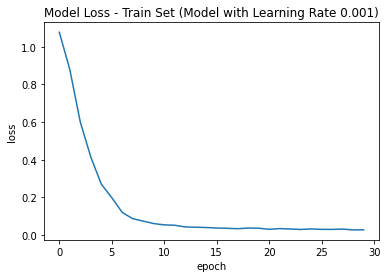

2/2 [==============================] - 0s 158ms/step

------------------------- Model Summary -------------------------
Model: "CNN-Model-LearningRate-0.001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 2D-Convolutional-Layer-1 (C  (None, 511, 511, 2)      10        
 onv2D)                                                          
                                                                 
 2D-MaxPool-Layer-1 (MaxPool  (None, 255, 255, 2)      0         
 ing2D)                                                          
                                                                 
 Dropout-Layer-1 (Dropout)   (None, 255, 255, 2)       0         
                                                                 
 Flatten-Layer (Flatten)     (None, 130050)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 4)            

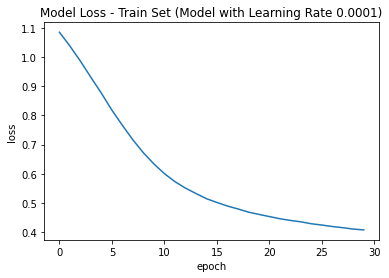

2/2 [==============================] - 0s 172ms/step

------------------------- Model Summary -------------------------
Model: "CNN-Model-LearningRate-0.0001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 2D-Convolutional-Layer-1 (C  (None, 511, 511, 2)      10        
 onv2D)                                                          
                                                                 
 2D-MaxPool-Layer-1 (MaxPool  (None, 255, 255, 2)      0         
 ing2D)                                                          
                                                                 
 Dropout-Layer-1 (Dropout)   (None, 255, 255, 2)       0         
                                                                 
 Flatten-Layer (Flatten)     (None, 130050)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 4)           

In [20]:
for lr in num_of_learningrate:
    # architecture
    model = Sequential(name=f'CNN-Model-LearningRate-{lr}') # Model
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1), name='Input-Layer'))
    model.add(Conv2D(filters=2, kernel_size=(2, 2), strides=(1, 1), activation='relu', name='2D-Convolutional-Layer-1'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='2D-MaxPool-Layer-1'))
    model.add(Dropout(0.3, name='Dropout-Layer-1'))
    model.add(Flatten(name='Flatten-Layer'))
    model.add(Dense(4, activation='relu', name='Hidden-Layer-1'))
    model.add(Dense(3, activation='softmax', name='Output-Layer'))
    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='SparseCategoricalCrossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(X_train, y_train, batch_size=32, epochs=30)
    # Print the results as needed
    print(f'Model with Learning Rate {lr} trained successfully.')
    plt.plot(history.history['loss'])
    plt.title(f'Model Loss - Train Set (Model with Learning Rate {lr})')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

    # Predict class labels on training data
    yhat_train = np.array(tf.math.argmax(model.predict(X_train),axis=1))
    # Predict class labels on a test data
    yhat_test = np.array(tf.math.argmax(model.predict(X_test),axis=1))

    # model summary
    print("")
    print('------------------------- Model Summary -------------------------')
    model.summary()
    print("")
    print('------------------ Evaluation on Training Data ------------------')
    # Print the last value in the evaluation metrics contained within history file
    for item in history.history:
        print("Final", item, ":", history.history[item][-1])
    print("")
    # Print classification report
    print(classification_report(y_train, yhat_train))
    print("")
    print(confusion_matrix(y_train, yhat_train))
    print("")

    print('-------------------- Evaluation on Test Data --------------------')
    print(classification_report(y_test, yhat_test))
    print("")
    print(confusion_matrix(y_test, yhat_test))
    print("")

    results['params'].append('Learning Rate '+str(lr))
    results['accuracy_train'].append(accuracy_score(y_train, yhat_train))
    results['accuracy_test'].append(accuracy_score(y_test, yhat_test))
    results['classification_report_train'].append(classification_report(y_train, yhat_train))
    results['classification_report_test'].append(classification_report(y_test, yhat_test))
    results['confusion_matrix_train'].append(confusion_matrix(y_train, yhat_train))
    results['confusion_matrix_test'].append(confusion_matrix(y_test, yhat_test))


In [21]:
results

{'params': ['Learning Rate 10',
  'Learning Rate 1',
  'Learning Rate 0.1',
  'Learning Rate 0.01',
  'Learning Rate 0.001',
  'Learning Rate 0.0001'],
 'accuracy_train': [0.3382352941176471,
  0.3627450980392157,
  0.3382352941176471,
  0.9901960784313726,
  0.9852941176470589,
  0.7990196078431373],
 'accuracy_test': [0.2692307692307692,
  0.3076923076923077,
  0.2692307692307692,
  0.9615384615384616,
  0.9807692307692307,
  0.7115384615384616],
 'classification_report_train': ['              precision    recall  f1-score   support\n\n           0       0.34      1.00      0.51        69\n           1       0.00      0.00      0.00        74\n           2       0.00      0.00      0.00        61\n\n    accuracy                           0.34       204\n   macro avg       0.11      0.33      0.17       204\nweighted avg       0.11      0.34      0.17       204\n',
  '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        69\n      

In [22]:
import pickle
# save dictionary to person_data.pkl file
with open('results_cnn_lr.pkl', 'wb') as fp:
    pickle.dump(results, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file
